<a href="https://colab.research.google.com/github/jvcamacho1/SignAi/blob/main/Hand_Recognition_LIBRAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD,Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = []
path = r'/content/drive/MyDrive/LIBRAS/Croped files'

X = ImageDataGenerator(
                       rescale=(1/255),
                       horizontal_flip=True,
                       validation_split=0.2
                       )

train = X.flow_from_directory(
                            directory=path, 
                            target_size=(100,100),
                            class_mode='categorical',
                            batch_size=10,
                            subset='training',
                            )

X = ImageDataGenerator(
                      rescale=(1/255),
                      validation_split=0.2)             
test = X.flow_from_directory(
                            directory=path, 
                            target_size=(100,100), 
                            class_mode='categorical',
                            batch_size=10,
                            subset='validation',
                            )

train_step = train.n//train.batch_size
test_step = test.n//test.batch_size

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
for i in range(5):
  img, label = train.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()


(0, 100, 100, 3)


IndexError: ignored

(10, 100, 100, 3)


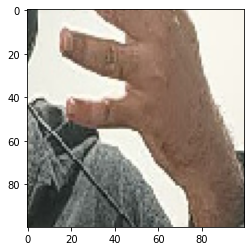

(2, 100, 100, 3)


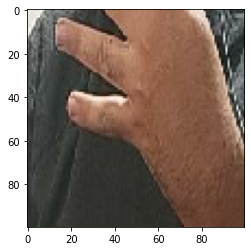

(10, 100, 100, 3)


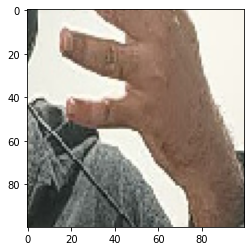

(2, 100, 100, 3)


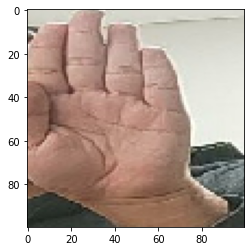

(10, 100, 100, 3)


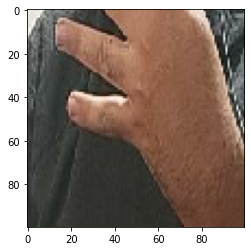

In [ ]:
for i in range(5):
  img, label = test.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()

In [ ]:
import json
d = {}
for i in range(6):
    d[i] = list(train.class_indices.keys())[i]
print(d)
with open('convert.txt', 'w') as convert_file:
     convert_file.write(json.dumps(d))

IndexError: ignored

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(6,activation ="softmax"))

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, steps_per_epoch=train_step, validation_data=test,validation_steps=test_step,epochs=1000)

model.save('/content/drive/MyDrive/LIBRAS/a3.h5')

ValueError: ignored

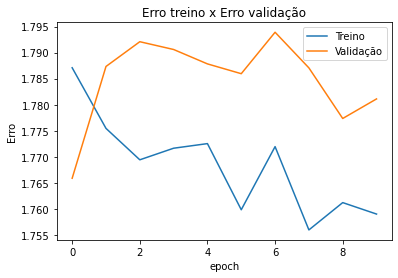

In [ ]:
plt.plot(history.history['loss'], label = 'Treino')
plt.plot(history.history['val_loss'], label = 'Validação')
plt.title('Erro treino x Erro validação')
plt.ylabel('Erro')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
d = {}
for i in range(6):
    d[i] = list(train.class_indices.keys())[i]
print(d)

{0: '1', 1: '2', 2: '4', 3: 'A', 4: 'B', 5: 'C'}


In [ ]:
img = cv2.imread('/content/drive/MyDrive/LIBRAS/Croped files/C/C9.jpg')
resized_image = cv2.resize(img, (100, 100))
input_image = np.expand_dims(resized_image, axis=0)
pred = model.predict(input_image)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/Croped files/1/19.jpg')
resized_image = cv2.resize(img, (100, 100))
input_image = np.expand_dims(resized_image, axis=0)
pred = model.predict(input_image)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/Croped files/2/29.jpg')
resized_image = cv2.resize(img, (100, 100))
input_image = np.expand_dims(resized_image, axis=0)
pred = model.predict(input_image)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/Croped files/4/49.jpg')
resized_image = cv2.resize(img, (100, 100))
input_image = np.expand_dims(resized_image, axis=0)
pred = model.predict(input_image)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/Croped files/B/B9.jpg')
resized_image = cv2.resize(img, (100, 100))
input_image = np.expand_dims(resized_image, axis=0)
pred = model.predict(input_image)
print(d[np.argmax(pred)], max(pred[0])*100)



1/1 [==============================] - 0s 106ms/step
C 96.7930555343628
1/1 [==============================] - 0s 43ms/step
C 95.15448212623596
1/1 [==============================] - 0s 45ms/step
C 64.79917168617249
1/1 [==============================] - 0s 43ms/step
C 64.91199731826782
1/1 [==============================] - 0s 41ms/step
C 99.93365406990051
